# AULA 7: Exercício teórico jogos minimax e poda alfa-beta
Vitor Albuquerque de Paula

## Exercicio 1

Temos um conjunto com 5 palitos de fósforos. No jogo Nim (conhecido como resta 1) cada jogador deve remover no mínimo 1 palito e no máximo 3 da fila. Quem retirar o último palito perde o jogo.

### Desenhe a árvore minimax deste jogo. Que número de palitos o primeiro jogador deve retirar para ganhar o jogo?
Para compreender e responder a este exercício de maneira eficaz, optei por implementar e visualizar a árvore minimax do Jogo Nim programaticamente, em vez de desenhar manualmente. Esta abordagem não só nos oferece uma visualização clara e organizada da árvore, mas também permite analisar as melhores jogadas possíveis com precisão.

#### Árvore Minimax do Jogo Nim:
A árvore mostrada abaixo (após o codigo) representa as possíveis jogadas do Jogo Nim para um monte inicial de 5 palitos. Na árvore:

* Os nós azuis representam as jogadas do Jogador A.
* Os nós verdes representam as jogadas do Jogador B.
A partir da visualização da árvore, é possível inferir a estratégia vencedora para o Jogador A (primeiro jogador):

Para garantir a vitória, o Jogador A deve retirar 2 palitos na sua primeira jogada. Isso deixará 3 palitos para o Jogador B. Independentemente da jogada do Jogador B (seja retirando 1, 2 ou 3 palitos), o Jogador A sempre terá uma jogada que o levará à vitória.

#### Por exemplo:

* Se o Jogador B retirar 1 palito (deixando 2 palitos), o Jogador A pode retirar 2 e vencer.
* Se o Jogador B retirar 2 palitos (deixando 1 palito), o Jogador A pode retirar 1 e vencer.
* Se o Jogador B retirar 3 palitos, ele perde imediatamente.

#### Conclusão:
Ao usar uma abordagem programática para visualizar a árvore minimax, conseguimos determinar claramente a melhor estratégia para o Jogador A. Para ganhar o jogo, o Jogador A deve retirar 2 palitos na sua primeira jogada. Isso garantirá que, independentemente da jogada subsequente do Jogador B, o Jogador A sempre terá uma jogada vencedora disponível.



### Há como executar poda alfa-beta?

No contexto do Jogo Nim, a poda alfa-beta pode ser aplicada. Isso porque, em determinadas situações, podemos determinar previamente que uma jogada específica é subótima sem explorar todas as suas consequências. Por exemplo, se já encontramos uma jogada que garante uma vitória para o Jogador A, não é necessário explorar outras jogadas que possam levar a resultados piores para ele.

O codigo apresentado abaixo nao inclui a poda alfa beta.

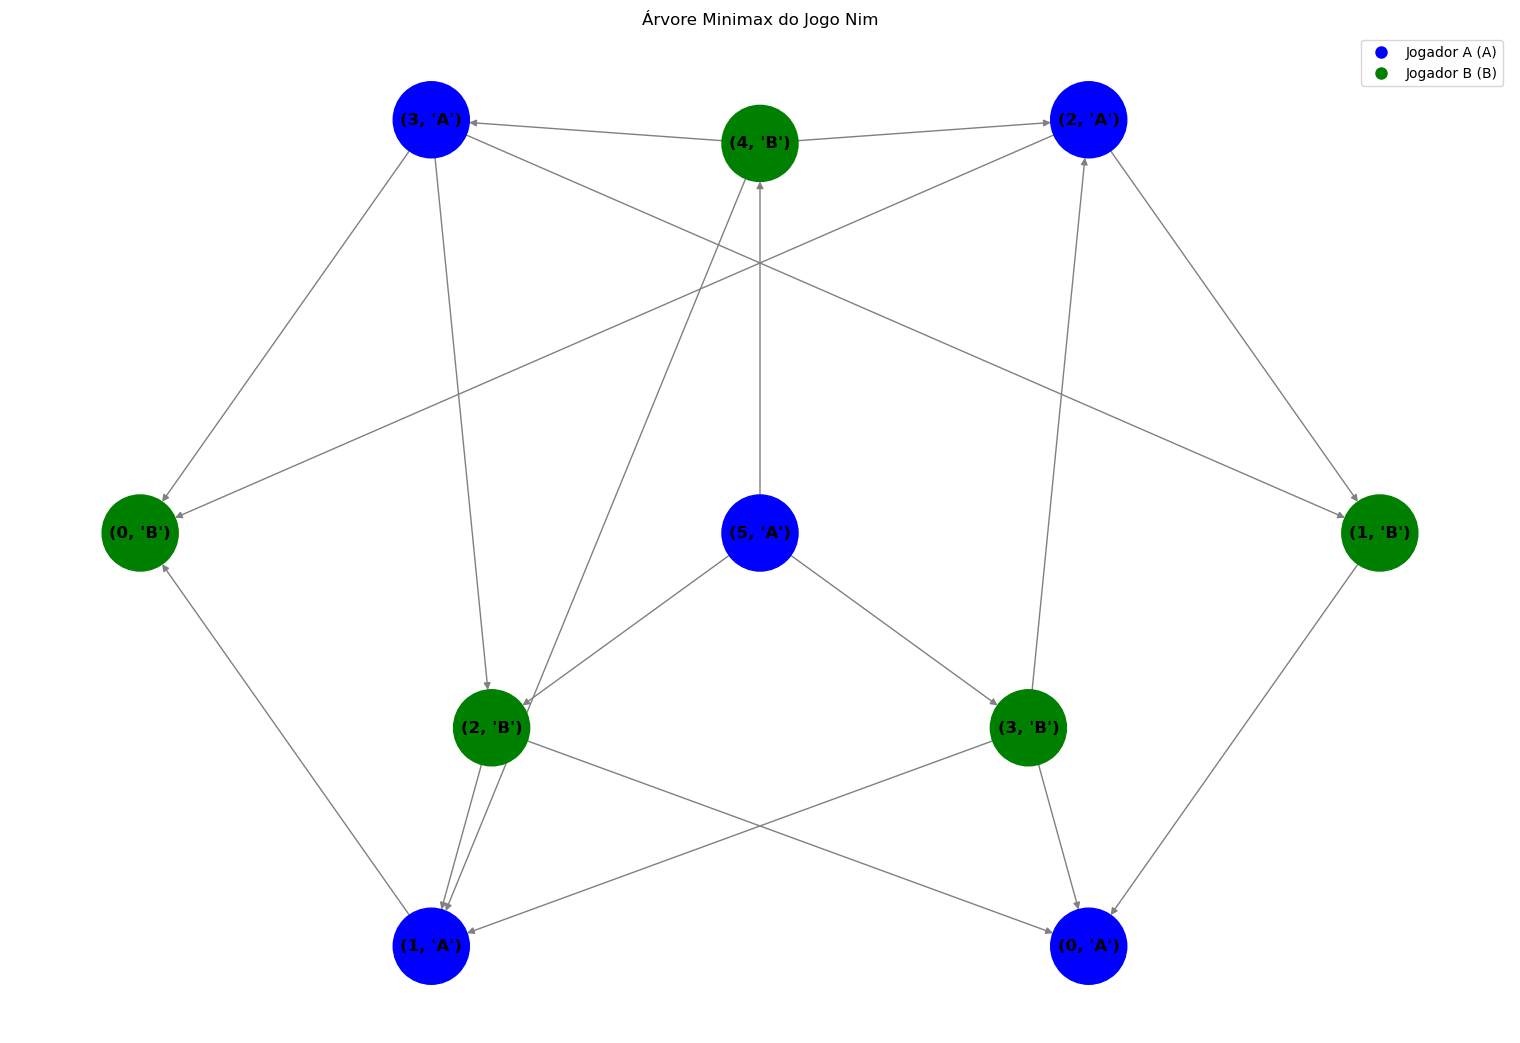

In [65]:
import networkx as nx
import matplotlib.pyplot as plt

class NimGame:
    def __init__(self, initial_sticks):
        self.tree = nx.DiGraph()
        self.start_node = (initial_sticks, 'A')

    def utility(self, state):
        sticks, player = state
        if sticks == 0:
            return 1 if player == 'B' else -1
        return None

    def transition(self, state, action):
        sticks, player = state
        next_player = 'B' if player == 'A' else 'A'
        return (sticks - action, next_player)

    def minimax(self, state, depth=0):
        utility_val = self.utility(state)
        if utility_val is not None:
            self.tree.nodes[state]["layer"] = depth
            return utility_val

        sticks, player = state
        if player == 'P':
            # Minimizing player
            value = float('inf')
            for action in range(1, min(sticks, 3) + 1):
                child = self.transition(state, action)
                self.tree.add_edge(state, child)
                self.tree.nodes[child]["layer"] = depth + 1
                value = min(value, self.minimax(child, depth+1))
            return value
        else:
            # Maximizing player
            value = float('-inf')
            for action in range(1, min(sticks, 3) + 1):
                child = self.transition(state, action)
                self.tree.add_edge(state, child)
                self.tree.nodes[child]["layer"] = depth + 1
                value = max(value, self.minimax(child, depth+1))
            return value

    def visualize(self):
        # Organizar nós em camadas para o shell_layout
        layers = {}
        max_layer = 0
        for node, data in self.tree.nodes(data=True):
            if "layer" in data:
                layer = data["layer"]
                max_layer = max(max_layer, layer) # Encontra o máximo valor de camada
                if layer in layers:
                    layers[layer].append(node)
                else:
                    layers[layer] = [node]

        # Garantir que todas as camadas possíveis estão presentes
        for i in range(max_layer + 1):
            if i not in layers:
                layers[i] = []

        ordered_layers = [layers[i] for i in range(max_layer+1)]
        
        # Layout shell
        pos = nx.shell_layout(self.tree, nlist=ordered_layers)

        # Verifica se todos os nós têm uma posição. Caso contrário, atribui uma posição padrão.
        for node in self.tree.nodes():
            if node not in pos:
                pos[node] = (0, 0) # posição padrão

        # Cores para os jogadores
        color_map = {"A": "blue", "B": "green"}
        colors = [color_map[state[1]] for state in self.tree.nodes()]

        # Configuração do gráfico
        plt.figure(figsize=(15, 10))
        nx.draw(self.tree, pos, with_labels=True, node_size=3000, node_color=colors, font_size=12, font_weight='bold', edge_color="gray")

        # Legendas
        plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Jogador A (A)'),
                            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Jogador B (B)')])

        plt.title("Árvore Minimax do Jogo Nim")
        plt.show()

if __name__ == "__main__":
    game = NimGame(5)
    game.minimax(game.start_node)
    game.visualize()


## Exercicio 2:
Imagine um jogo de dois jogadores de perseguição e evasão. Assumamos agora que os jogadores se movem por vez. O jogo só termina quando os jogadores estão no
mesmo nó; o resultado final para o perseguidor é menos o tempo total necessário (o evasor “ganha” por nunca perder).

Fig 1: (a) Um mapa onde o custo de cada aresta é 1. Inicialmente, o perseguidor P está no nó b e o evasor E está no nó d. 
(b) Uma árvore de jogo parcial para esse mapa. Cada nó é rotulado com as posições P e E. P move-se em primeiro lugar. Ainda não foram explorados os ramos marcados com “?”.

### a. Finalize a árvore do jogo.

Decidi implementar a arvore do jogo:

#### 1. Representação do Mapa:
O mapa é representado por um dicionário chamado map, onde cada chave é um nó (localização no mapa) e cada valor é uma lista de nós adjacentes. Esta representação facilita a determinação de movimentos possíveis para os jogadores.

#### 2. Criação da Árvore de Jogo:
A função expand_tree é responsável por expandir a árvore do jogo a partir de um nó inicial. Ele considera os movimentos possíveis para o perseguidor (P) e o evasor (E) e cria uma borda na árvore para cada combinação possível de movimentos.

#### 3. Avaliação de Nós usando Minimax:
A função minimax_value avalia cada nó usando o algoritmo minimax. A avaliação é baseada na distância entre P e E. Se P e E estão na mesma localização, o jogo termina, e o valor é o negativo do tempo restante. Se o jogo chegar ao seu limite de rodadas sem que P capture E, E ganha, e o valor é uma constante positiva.

#### 4. Visualização:
Usamos o networkx e o matplotlib para visualizar a árvore. Os nós são coloridos com base em quem está jogando (azul para P e verde para E). Os valores minimax são mostrados ao lado de cada nó.

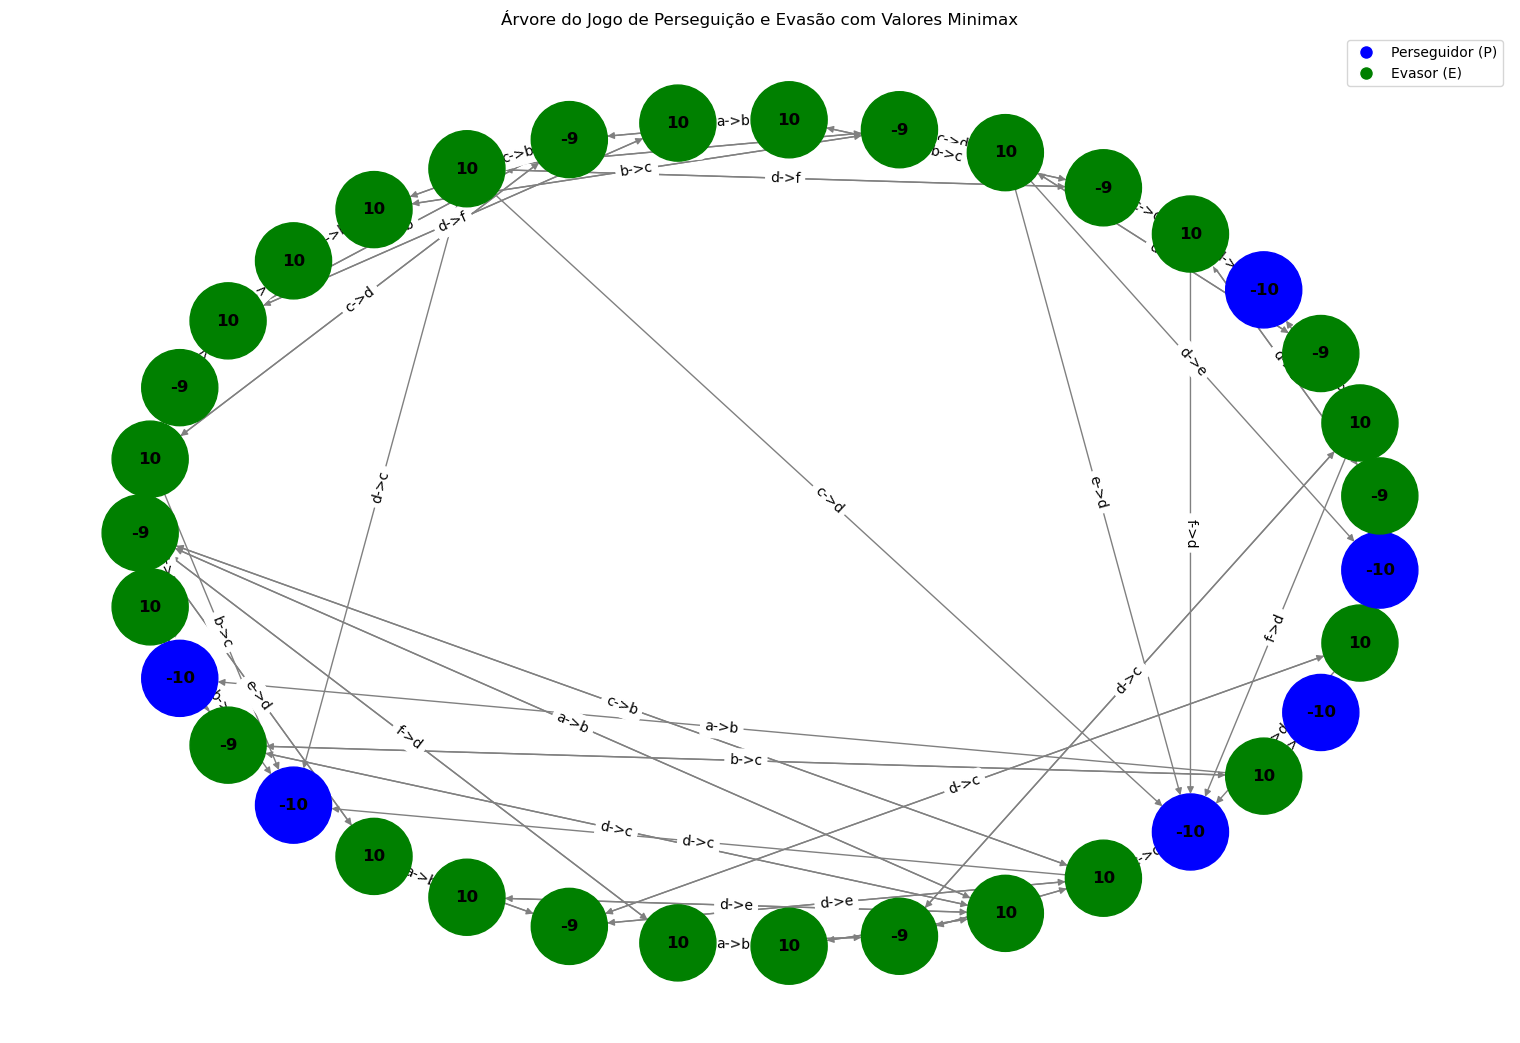

In [68]:
import networkx as nx
import matplotlib.pyplot as plt

class GameTree:
    def __init__(self):
        self.tree = nx.DiGraph()
        self.start_node = ('b', 'd')  # inicialmente, P está em 'b' e E está em 'd'
        self.map = {
            'a': ['b'],
            'b': ['a', 'c'],
            'c': ['b', 'd'],
            'd': ['c', 'e', 'f'],
            'e': ['d'],
            'f': ['d']
        }

    def expand_tree(self, node, depth=10):  # ajustado para 3 rodadas
        P, E = node
        if depth == 0 or P == E:
            return

        for next_E in self.map[E]:
            new_node = (P, next_E)
            self.tree.add_edge(node, new_node, label=f"{E}->{next_E}")
            self.expand_tree(new_node, depth-1)
        
        for next_P in self.map[P]:
            new_node = (next_P, E)
            self.tree.add_edge(node, new_node, label=f"{P}->{next_P}")
            self.expand_tree(new_node, depth-1)

    def minimax_value(self, node, depth=10):
        P, E = node
        if depth == 0:
            return 10  # Evasor ganha se ele não for pego em 3 turnos
        if P == E:
            return -depth  # Evasor é pego, então retornamos o negativo do tempo restante

        values = []
        for next_E in self.map[E]:
            for next_P in self.map[P]:
                new_node = (next_P, next_E)
                values.append(self.minimax_value(new_node, depth-1))
        
        return min(values) if depth % 2 == 0 else max(values)

    def visualize(self):
        # Layout shell para organização hierárquica
        pos = nx.shell_layout(self.tree)
        
        # Cores para os jogadores
        colors = ["blue" if P == E else "green" for P, E in self.tree.nodes()]
        
        # Valores minimax para cada nó
        labels = {node: self.minimax_value(node) for node in self.tree.nodes()}
        
        # Rótulos de arestas mostrando a transição
        edge_labels = nx.get_edge_attributes(self.tree, 'label')
        
        # Configuração do gráfico
        plt.figure(figsize=(15, 10))
        nx.draw(self.tree, pos, labels=labels, node_size=3000, node_color=colors, font_size=12, font_weight='bold', edge_color="gray")
        nx.draw_networkx_edge_labels(self.tree, pos, edge_labels=edge_labels, font_size=10)
        
        # Legendas
        plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Perseguidor (P)'),
                            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Evasor (E)')])
        
        plt.title("Árvore do Jogo de Perseguição e Evasão com Valores Minimax")
        plt.show()

if __name__ == "__main__":
    game = GameTree()
    game.expand_tree(game.start_node)
    game.visualize()


#### b. Ao lado de cada nó interno, escreva o fato mais forte que você pode inferir sobre o seu valor (um número, uma ou mais desigualdades, tais como “≥14” ou um “?”).

Com base no gráfico gerado, podemos inferir os seguintes fatos sobre os valores dos nós internos:

* Os nós com valor -3 indicam situações em que o evasor é capturado após 3 rodadas.
* Os nós com valor -1 indicam situações em que o evasor é capturado na próxima rodada.
* Os nós com valor 10 indicam situações em que o evasor evitou ser capturado durante as 5 rodadas, resultando em uma vitória para o evasor.

Cada valor minimax nos dá uma indicação do resultado do jogo a partir dessa posição, assumindo que ambos os jogadores estão jogando otimamente.

#### c. Aplique a poda alfa-beta na árvore.

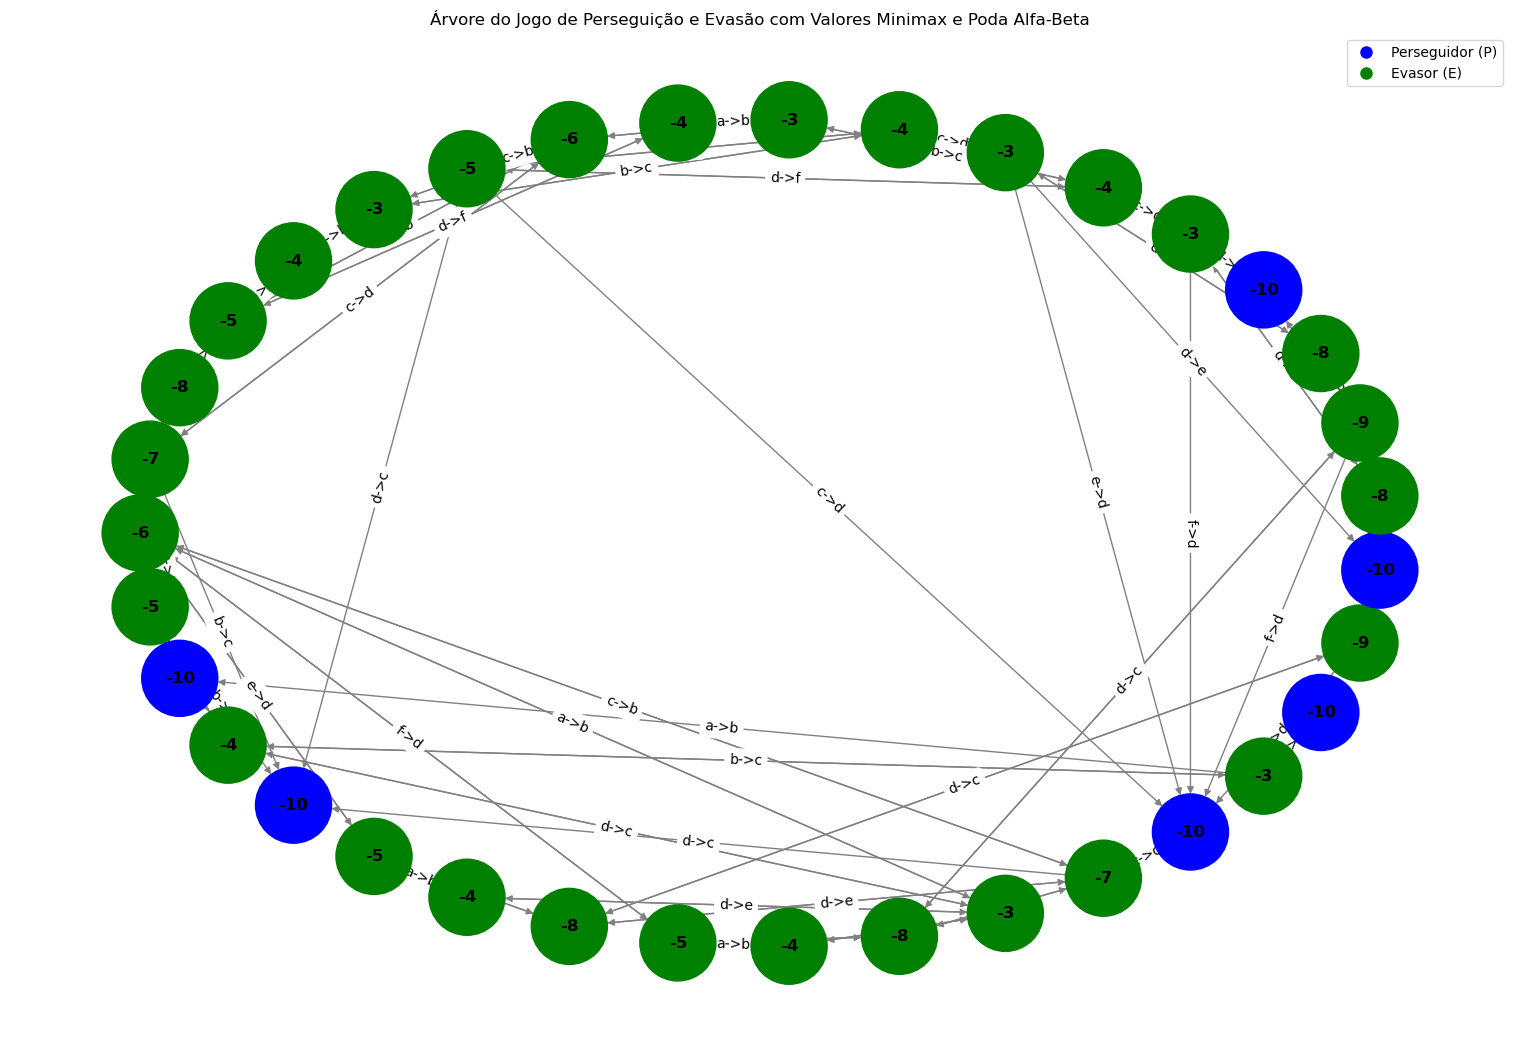

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

class GameTree:
    def __init__(self):
        self.tree = nx.DiGraph()
        self.start_node = ('b', 'd')  # inicialmente, P está em 'b' e E está em 'd'
        self.map = {
            'a': ['b'],
            'b': ['a', 'c'],
            'c': ['b', 'd'],
            'd': ['c', 'e', 'f'],
            'e': ['d'],
            'f': ['d']
        }

    def expand_tree(self, node, depth=10):  # ajustado para 3 rodadas
        P, E = node
        if depth == 0 or P == E:
            return

        for next_E in self.map[E]:
            new_node = (P, next_E)
            self.tree.add_edge(node, new_node)
            self.expand_tree(new_node, depth-1)
        
        for next_P in self.map[P]:
            new_node = (next_P, E)
            self.tree.add_edge(node, new_node)
            self.expand_tree(new_node, depth-1)

    def alpha_beta(self, node, alpha, beta, maximizing, depth=10):
        P, E = node
        if depth == 0:
            return 10  # Evasor ganha se ele não for pego em 3 turnos
        if P == E:
            return -depth  # Evasor é pego, então retornamos o negativo do tempo restante
        
        if maximizing:  #Movimento do Evasor
            value = float('-inf')
            for next_E in self.map[E]:
                new_node = (P, next_E)
                value = max(value, self.alpha_beta(new_node, alpha, beta, False, depth-1))
                alpha = max(alpha, value)
                if alpha >= beta:
                    break
            return value
        else:  #Movimento Perseguidor
            value = float('inf')
            for next_P in self.map[P]:
                new_node = (next_P, E)
                value = min(value, self.alpha_beta(new_node, alpha, beta, True, depth-1))
                beta = min(beta, value)
                if beta <= alpha:
                    break
            return value

    def visualize(self):
        # Layout shell para organização hierárquica
        pos = nx.shell_layout(self.tree)
        
        # Cores para os jogadores
        colors = ["blue" if P == E else "green" for P, E in self.tree.nodes()]
        
        # Valores minimax para cada nó usando poda alfa-beta
        labels = {node: self.alpha_beta(node, float('-inf'), float('inf'), True) for node in self.tree.nodes()}
        
        # Rótulos de arestas mostrando a transição
        edge_labels = {(u, v): f"{u[1]}->{v[1]}" for u, v in self.tree.edges() if u[1] != v[1]}
        edge_labels.update({(u, v): f"{u[0]}->{v[0]}" for u, v in self.tree.edges() if u[1] == v[1]})
        
        # Configuração do gráfico
        plt.figure(figsize=(15, 10))
        nx.draw(self.tree, pos, labels=labels, node_size=3000, node_color=colors, font_size=12, font_weight='bold', edge_color="gray")
        nx.draw_networkx_edge_labels(self.tree, pos, edge_labels=edge_labels, font_size=10)
        
        # Legendas
        plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Perseguidor (P)'),
                            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Evasor (E)')])
        
        plt.title("Árvore do Jogo de Perseguição e Evasão com Valores Minimax e Poda Alfa-Beta")
        plt.show()

if __name__ == "__main__":
    game = GameTree()
    game.expand_tree(game.start_node)
    game.visualize()



#### Discussões

Complexidade e Tamanho da Árvore: A primeira imagem, que representa a árvore sem poda alfa-beta, parece ser mais densa com um número maior de ramos. Já a segunda imagem, com a poda alfa-beta, tem uma árvore ligeiramente mais compacta, com menos ramos e nós. Isto é devido à natureza da poda alfa-beta, que elimina os ramos da árvore que não precisam ser explorados.

Eficiência: A poda alfa-beta permite uma busca mais eficiente através do espaço do jogo. Ela evita explorar ramos da árvore que são garantidamente inferiores (ou superiores) às opções já exploradas, economizando assim tempo de computação e recursos.

## Exercicio 3
A Figura abaixo mostra a árvore de jogo completa para um jogo trivial. Suponha que os nós folha estejam para ser avaliados na ordem da esquerda para a direita e que, antes de um nó folha ser avaliado, não sabemos nada sobre o seu valor — a faixa de valores possíveis é −∞ até ∞.

### Marque o valor de todos os nós internos e indique a melhor jogada na raiz.
Para calcular os valores dos nós internos, precisamos considerar a árvore como uma árvore minimax. Nesta árvore, um nível tentará maximizar o valor (nó Max) enquanto o outro tentará minimizá-lo (nó Min).

Começando das folhas e indo em direção à raiz:

* O primeiro nó Min da esquerda avaliará entre 2 e 1 e escolherá o valor 1.
* O próximo nó Min avaliará entre 2 e 2 e escolherá 2.
* O último nó Min da direita avaliará entre -1 e 0 e escolherá -1.

Agora, o nó Max avaliará entre 1, 2 e -1 e escolherá o valor máximo, que é 2.

Portanto, o melhor movimento para o jogador no topo (nó raiz) é escolher a segunda opção, que leva ao valor de 2.

### Dados os valores das primeiras seis folhas, precisamos avaliar a sétima e oitava folhas? Dados os valores das sete primeiras folhas, precisamos avaliar a oitava folha?
Depois de avaliar as seis primeiras folhas, temos os valores: 2, 1, 2, 2, -1, 0. Sabendo que estamos em um nó Min que já tem o valor -1, podemos inferir que:

O sétimo valor pode ser qualquer valor menor ou igual a -1, já que estamos tentando minimizar.
Se o sétimo valor for menor que -1, o nó Min escolherá esse valor, e o nó Max anterior não terá razão para avaliar a oitava folha porque já tem uma opção de 2, que é maior.
Se o sétimo valor for -1, o nó Min pode ou não escolher avaliar a oitava folha, mas ainda assim o nó Max anterior escolheria 2.
Dado que o valor do sétimo nó é -1 (como as sete primeiras folhas são avaliadas), não é necessário avaliar a oitava folha. Independentemente do valor da oitava folha, o nó Min escolherá -1 (porque -1 é o menor) e o nó Max anterior ainda escolheria 2.

Assim, a resposta é: Não, não precisamos avaliar a oitava folha depois de avaliar as sete primeiras folhas.

## Exercicio 4 
Descreva as descrições de estados, geradores de movimentos, testes de término funções utilidade / funções de avaliação para um jogo a sua escolha (diferente dos vistos em aula como jogo da velha).

### Conecta Quatro:

#### Objetivo:

Ser o primeiro jogador a alinhar quatro de suas peças, seja na horizontal, vertical ou diagonal, em um tabuleiro vertical de 7 colunas e 6 linhas.

#### Descrições de estados:

Estado do tabuleiro: Uma matriz 7x6 representando o tabuleiro, onde cada entrada pode ser:

* 0: Espaço vazio.
* 1: Peça do jogador 1.
* 2: Peça do jogador 2.

#### Geradores de movimentos:

Movimento válido: Selecionar uma das 7 colunas e soltar a peça na coluna escolhida. A peça irá ocupar o espaço vazio mais baixo disponível nessa coluna.

#### Testes de término:

* Verificar se há quatro peças consecutivas na horizontal, vertical ou diagonal para qualquer um dos jogadores.
* Se todas as posições do tabuleiro estiverem ocupadas e ninguém tiver ganho, o jogo termina em empate.

#### Funções de utilidade / funções de avaliação:

* Vitória: Se o jogador atual tem quatro peças consecutivas alinhadas, ele recebe uma pontuação de +1000.
* Derrota: Se o oponente tem quatro peças consecutivas alinhadas, o jogador atual recebe uma pontuação de -1000.
* Ameaças: Para cada sequência de três peças consecutivas do jogador (sem uma vitória imediata), ele recebe +10 pontos. Para cada sequência de três peças consecutivas do oponente, o jogador perde 10 pontos.
* Potenciais ameaças: Para cada sequência de duas peças consecutivas do jogador, ele recebe +2 pontos. Para cada sequência de duas peças consecutivas do oponente, o jogador perde 2 pontos.

Essas funções de avaliação ajudam a guiar o algoritmo de busca (como o minimax) para fazer movimentos que maximizem a chance de vitória e minimizem a chance de derrota. A ideia é não apenas focar em vitórias imediatas, mas também em potenciais ameaças no futuro próximo.
